In [43]:
install.packages("ClusterR")
install.packages("cluster")
library(xlsx)
library(ClusterR)
library(cluster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [44]:
#1. Veri Okuma
dir_path  <- "../input/dry-bean//Dry_Bean_Dataset.xlsx"
data <- as.data.frame(read.xlsx(dir_path, sheetName = "Dry_Beans_Dataset"))

In [45]:
#2. Veri Hazırlama
data_cluster <- data[, -17]


In [46]:
#3. Model Oluşturma
set.seed(0) # Setting seed
kmeans.re <- kmeans(data_cluster, centers = 7, nstart = 10)

In [53]:
data$class_as_numeric <- as.numeric(factor(data$Class))
cm <- table(data$class_as_numeric, kmeans.re$cluster)
cm

   
       1    2    3    4    5    6    7
  1  649   64  348    0    0    3  258
  2    0    0    0  516    0    0    6
  3  894    8  176    0    0    0  552
  4    0    0    0    0 2333 1213    0
  5  106  716  952    0   10  143    1
  6    0  446   28    0  179 1374    0
  7    0 1573  101    0   18  944    0

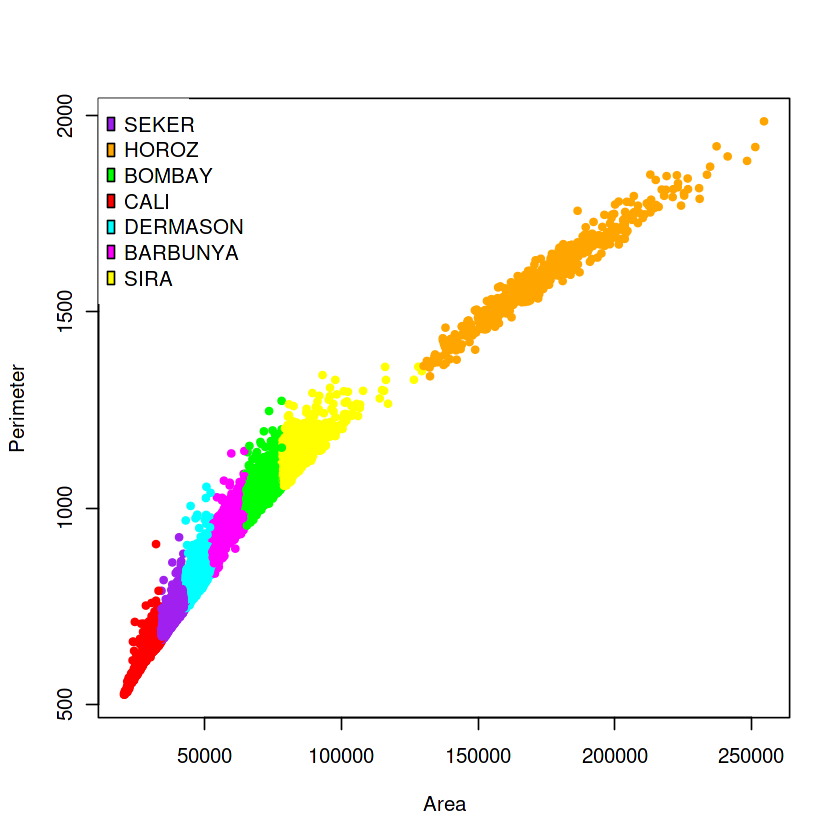

In [49]:
#2 boyutlu görselleştirme
colors <- c('green','cyan','magenta','orange','red',' purple','yellow')
plot(data_cluster[c("Area", "Perimeter")],pch=20, col = colors[kmeans.re$cluster])
#par(new=TRUE)
#plot(kmeans.re$centers[, c("Area", "Perimeter")],pch=20, col = c('black'),yaxt="none",xaxt="none")
legend(x="toplef", legend=c('SEKER', 'HOROZ', 'BOMBAY', 'CALI', 'DERMASON', 'BARBUNYA', 'SIRA'), 
       fill = c('purple','orange','green','red','cyan','magenta','yellow'),
       col = 1:2,
       cex = 1,
       box.lwd = 0,
      )

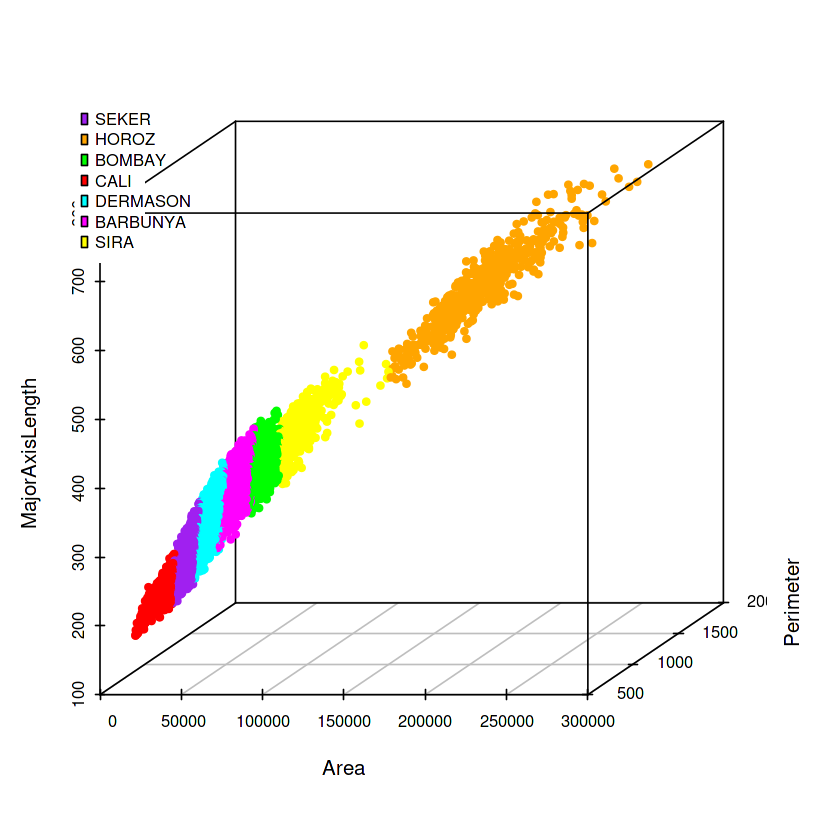

In [52]:
#3 boyutlu görselleştirme

colors <- c('green','cyan','magenta','orange','red',' purple','yellow')

library(scatterplot3d)
scatterplot3d(data[,0:3], pch=20, color=colors[kmeans.re$cluster])
legend(x="toplef", legend=c('SEKER', 'HOROZ', 'BOMBAY', 'CALI', 'DERMASON', 'BARBUNYA', 'SIRA'), 
       fill = c('purple','orange','green','red','cyan','magenta','yellow'),
       col = 1:2,
       cex = 0.8,
       box.lwd = 0,
      )